# 1.  학습 데이터 만들기

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
x_train = np.linspace(-1,1,101)

##  기준값을 구하기 위해 편향을  정의

In [8]:
np.random.randn(*x_train.shape)

array([-1.97613166e+00, -1.62936564e-02,  6.31361471e-01, -9.17750611e-01,
        3.30183453e-01,  1.12857506e+00, -2.33985314e+00,  6.60446185e-01,
       -1.56517030e+00, -2.10052278e+00, -1.12359247e-01,  9.38960737e-02,
        2.30494284e+00,  1.89500656e+00, -6.84983967e-01,  3.99651903e-01,
        1.51165388e+00,  3.57775655e-01, -1.22559626e+00, -4.15984016e-01,
        1.09867921e+00,  3.82028824e-01, -1.09902759e+00, -2.76490924e-01,
       -7.30278467e-01, -3.86889113e-01,  7.56975109e-02,  2.07787320e-01,
       -1.57079432e+00,  1.34573902e+00, -1.50984790e-01,  1.15942225e+00,
        9.05274475e-01, -1.26946065e+00, -4.57317229e-02,  9.11267848e-01,
       -9.29769055e-01, -1.97226355e+00,  1.93379752e+00, -7.89902607e-01,
       -6.83552580e-01,  1.65069663e-01, -2.62393173e+00, -8.49869658e-01,
       -3.72713470e-01,  3.04034577e-01, -1.71636081e-01,  1.06053046e-01,
        1.88381742e+00, -3.62403272e-01, -1.21375930e+00, -6.18309405e-01,
       -2.93564699e+00, -

In [9]:
np.random.randn(*x_train.shape) * 0.33

array([ 0.36232584,  0.40589663, -0.01650108, -0.33441379, -0.44111226,
        0.10154034,  0.0902676 ,  0.27655693, -0.27164938,  1.07379088,
       -0.56309382,  0.06846653, -0.62599199, -0.15746523, -0.41946957,
        0.05328127, -0.42361996, -0.99485742,  0.02478214,  0.14930091,
       -0.16305865,  0.10482253, -0.0974858 ,  0.41387109,  0.24669051,
        0.2619002 ,  0.03728549, -0.09273027, -0.33272418, -0.40397382,
        0.12630832,  0.11887306,  0.29474517,  0.37748623, -0.26533373,
       -0.08974333,  0.16029906, -0.25027766,  0.21849118, -0.03944308,
        0.21858943,  0.00601614,  0.09508811,  0.52539025, -0.31237988,
       -0.20237693,  0.19826522, -0.04277091, -0.26303471, -0.04069198,
       -0.01203047,  0.27927788, -0.20984776,  0.18312446, -0.26844519,
        0.32717756, -0.96937599,  0.36199408, -0.39180681,  0.17096338,
        0.50361334, -0.25882345, -0.15485015, -0.24277096, -0.04246111,
       -0.50592769,  0.04696199,  0.02783537, -0.60380334,  0.14

In [6]:
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

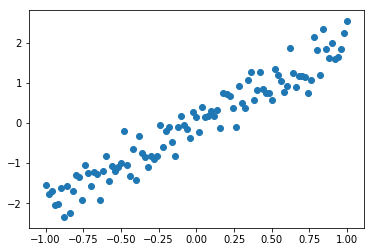

In [7]:
plt.scatter(x_train, y_train)

# 2. 선형회귀 문제 해결하기

In [10]:
import tensorflow as tf

## 2-1 하이퍼파라미터 지정 : 학습률과 에포크

In [11]:
learning_rate = 0.01

In [12]:
training_epochs = 100

In [13]:
X = tf.placeholder(tf.float32)

In [14]:
Y = tf.placeholder(tf.float32)

## 2-2 모델 정의

In [15]:
def model(X, w) :
    return tf.multiply(X, w)

In [16]:
w = tf.Variable(0.0, name="weights")

Instructions for updating:
Colocations handled automatically by placer.


## 2-3 비용함수 정의

In [17]:
y_model = model(X, w)

In [18]:
cost = tf.square(Y-y_model)

##  2-4 비용 최적화 처리

In [19]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## 2-5 세션 만들기 

In [20]:
sess = tf.Session()

## 2-6  변수 초기화 하기

In [21]:
init = tf.global_variables_initializer()

In [22]:
sess.run(init)

## 3. 학습 시키기

In [23]:
for epoch in range(training_epochs) :
    for (x,y) in zip(x_train, y_train) :
        sess.run(train_op, feed_dict={X : x, Y : y})
        

In [24]:
w_val = sess.run(w)

In [25]:
sess.close()

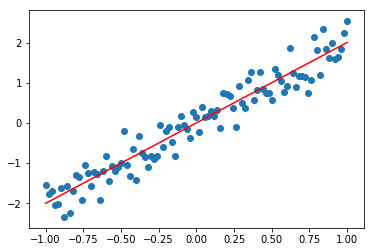

In [33]:
plt.scatter(x_train, y_train)

plt.plot(x_train, y_learned, 'r' )
plt.show()

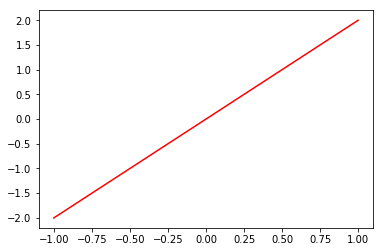

In [32]:
plt.plot(x_train, y_learned, 'r' )
plt.show()

In [34]:
y_learned = x_train * w_val

In [40]:
y_learned

array([-2.00199199, -1.96195215, -1.92191231, -1.88187247, -1.84183263,
       -1.80179279, -1.76175295, -1.72171311, -1.68167327, -1.64163343,
       -1.60159359, -1.56155375, -1.52151391, -1.48147407, -1.44143423,
       -1.40139439, -1.36135455, -1.32131471, -1.28127487, -1.24123503,
       -1.20119519, -1.16115535, -1.12111551, -1.08107567, -1.04103583,
       -1.00099599, -0.96095615, -0.92091631, -0.88087647, -0.84083663,
       -0.80079679, -0.76075696, -0.72071712, -0.68067728, -0.64063744,
       -0.6005976 , -0.56055776, -0.52051792, -0.48047808, -0.44043824,
       -0.4003984 , -0.36035856, -0.32031872, -0.28027888, -0.24023904,
       -0.2001992 , -0.16015936, -0.12011952, -0.08007968, -0.04003984,
        0.        ,  0.04003984,  0.08007968,  0.12011952,  0.16015936,
        0.2001992 ,  0.24023904,  0.28027888,  0.32031872,  0.36035856,
        0.4003984 ,  0.44043824,  0.48047808,  0.52051792,  0.56055776,
        0.6005976 ,  0.64063744,  0.68067728,  0.72071712,  0.76

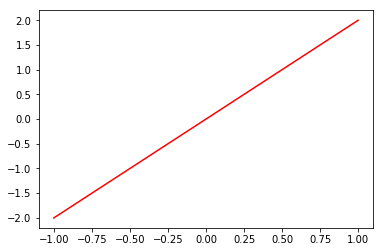

In [37]:
plt.plot(x_train, y_learned,  'r')

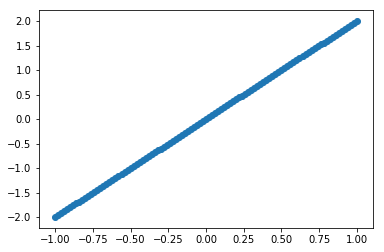

In [43]:
plt.scatter(x_train, y_learned, marker='o')
